In [4]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7134 images belonging to 3 classes.
Found 206 images belonging to 3 classes.


In [5]:

# create model structure
RPS_model = Sequential()

RPS_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
RPS_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
RPS_model.add(MaxPooling2D(pool_size=(2, 2)))
RPS_model.add(Dropout(0.25))
RPS_model.add(Flatten())
RPS_model.add(Dense(1024, activation='relu'))
RPS_model.add(Dropout(0.5))
RPS_model.add(Dense(3, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

RPS_model.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [6]:
import matplotlib.pyplot as plt

# Define the number of training epochs
epochs = 100  # Specify the total number of training epochs

# Create empty lists to store training history
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []

# Training loop for the specified number of epochs
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for one epoch
    history = RPS_model.fit(
        train_generator,
        steps_per_epoch=7145 // 64,  # Adjust based on your batch size
        epochs=1,  # Train for one epoch at a time
        validation_data=validation_generator,
        validation_steps=206 // 64  # Adjust based on your batch size
    )
    
    # Append training metrics to the lists
    train_loss.append(history.history['loss'][0])  # [0] is used to get the value for the current epoch
    val_loss.append(history.history['val_loss'][0]) 
    train_accuracy.append(history.history['accuracy'][0])  
    val_accuracy.append(history.history['val_accuracy'][0]) 




Epoch 1/100
111/111 [==============================] - 43s 381ms/step - loss: 1.1744 - accuracy: 0.3809 - val_loss: 1.0751 - val_accuracy: 0.4375
Epoch 2/100
111/111 [==============================] - 41s 366ms/step - loss: 1.0489 - accuracy: 0.4539 - val_loss: 0.9944 - val_accuracy: 0.5104
Epoch 3/100
111/111 [==============================] - 41s 368ms/step - loss: 0.9401 - accuracy: 0.5421 - val_loss: 0.9316 - val_accuracy: 0.5365
Epoch 4/100
111/111 [==============================] - 43s 385ms/step - loss: 0.7819 - accuracy: 0.6502 - val_loss: 0.8700 - val_accuracy: 0.6302
Epoch 5/100
111/111 [==============================] - 44s 395ms/step - loss: 0.6181 - accuracy: 0.7443 - val_loss: 0.9623 - val_accuracy: 0.6042
Epoch 6/100
111/111 [==============================] - 43s 384ms/step - loss: 0.4868 - accuracy: 0.8160 - val_loss: 0.9062 - val_accuracy: 0.6198
Epoch 7/100
111/111 [==============================] - 43s 385ms/step - loss: 0.3895 - accuracy: 0.8618 - val_loss: 0.9370 -

Epoch 57/100
111/111 [==============================] - 52s 466ms/step - loss: 0.1298 - accuracy: 0.9231 - val_loss: 0.9343 - val_accuracy: 0.6927
Epoch 58/100
111/111 [==============================] - 1482s 13s/step - loss: 0.1376 - accuracy: 0.9195 - val_loss: 1.0616 - val_accuracy: 0.6979
Epoch 59/100
111/111 [==============================] - 45s 405ms/step - loss: 0.1334 - accuracy: 0.9209 - val_loss: 1.0127 - val_accuracy: 0.6667
Epoch 60/100
111/111 [==============================] - 1001s 9s/step - loss: 0.1323 - accuracy: 0.9255 - val_loss: 1.1167 - val_accuracy: 0.6771
Epoch 61/100
111/111 [==============================] - 44s 391ms/step - loss: 0.1310 - accuracy: 0.9281 - val_loss: 1.0924 - val_accuracy: 0.6927
Epoch 62/100
111/111 [==============================] - 950s 9s/step - loss: 0.1325 - accuracy: 0.9240 - val_loss: 1.0476 - val_accuracy: 0.6771
Epoch 63/100
111/111 [==============================] - 945s 9s/step - loss: 0.1319 - accuracy: 0.9250 - val_loss: 0.9883

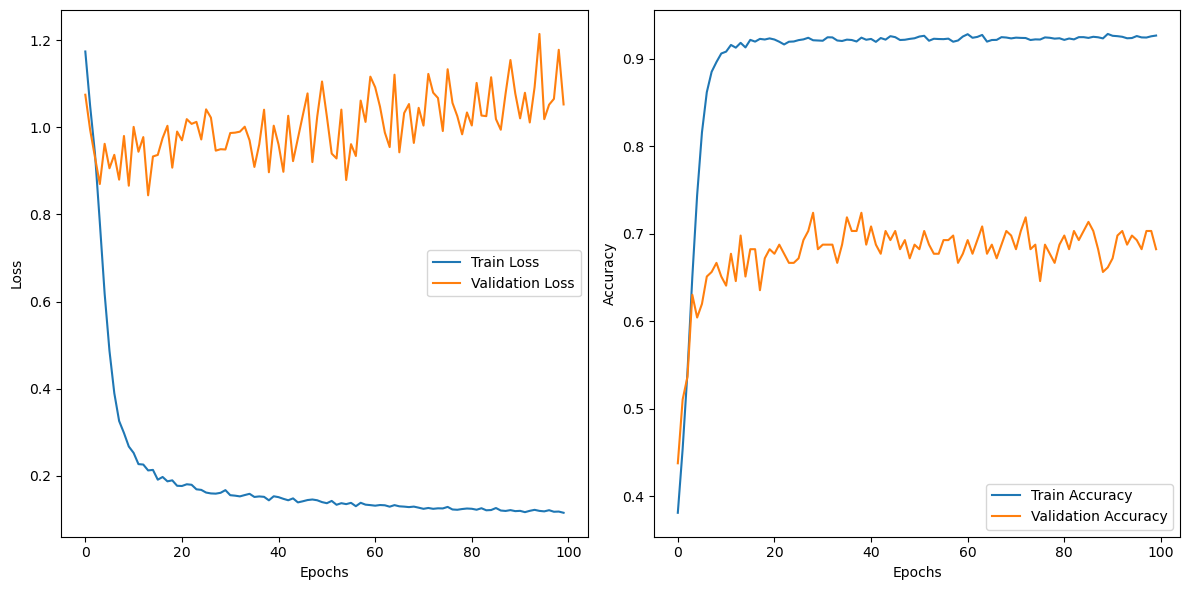

<Figure size 640x480 with 0 Axes>

In [7]:
# After all epochs are completed, draw the chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss, label='Train Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy, label='Train Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('training_progress_relu_lesslayers.png')

In [8]:
# save model structure in jason file
model_json = RPS_model.to_json()
with open("RPS_model_lesslayers.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
RPS_model.save_weights('RPS_model_lesslayers.h5')